# This example demonstrates slow control display and DQM selection using crv_spill class.

In [1]:
from __future__ import print_function
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import ROOT
from ROOT import TCanvas, TH1F, TH2F, TF1, TMath, TGraph, TFile, TSpectrum, TPaveText, TMultiGraph, TGraphErrors, TLine
from ROOT import gStyle, gROOT, gDirectory, gPad

import constants
import crv_event
import crv_spill
import utils
import geometry
import geometry_constants
import filepath

fileList, runNumList, configList, nFEBlist = filepath.getfilelist(filepath.ds_temp_scan_cosmics + filepath.ds_temp_scan_led)
nSmooth = 1   

Welcome to JupyROOT 6.28/00


Reading file: rec.mu2e.CRV_wideband_cosmics.crvaging-007.001312_001.root
*** WARNING: CRV_spill: __init__: Spill # 1083 has bad time stamp
*** first spill has spill number 1083
Spill index 1 failed DQM check: 10
*** spill 1083 timestamp amended: 1674857464-180
*** WARNING: CRV_spill: getTempCMB: Spill # 1104 has no actual event
*** [ 1.4982e+01  1.4904e+01  1.4904e+01  1.5120e+01 -6.0000e-03  1.5120e+01] [ 9.8720e+00  9.8560e+00  9.8680e+00  9.9120e+00 -4.0000e-03  1.0868e+01] [ 5.010e+00  5.040e+00  4.996e+00  5.024e+00 -2.000e-03  5.000e+00] [-4.928e+00 -4.958e+00 -4.978e+00 -4.960e+00  2.000e-03 -4.936e+00] [ 3.339e+00  3.331e+00  3.354e+00  3.342e+00 -1.000e-03  3.329e+00] [ 2.513e+00  2.514e+00  2.502e+00  2.502e+00 -1.000e-03  2.529e+00] [ 1.793e+00  1.797e+00  1.798e+00  1.795e+00 -1.000e-03  1.796e+00] [ 1.207e+00  1.211e+00  1.209e+00  1.205e+00 -1.000e-03  1.204e+00]
*** FEB 4 SiPM # 0 -0.02
*** FEB 4 SiPM # 1 -0.02
*** FEB 4 SiPM # 2 -0.02
*** FEB 4 SiPM # 3 -0.02
*** FEB 4 

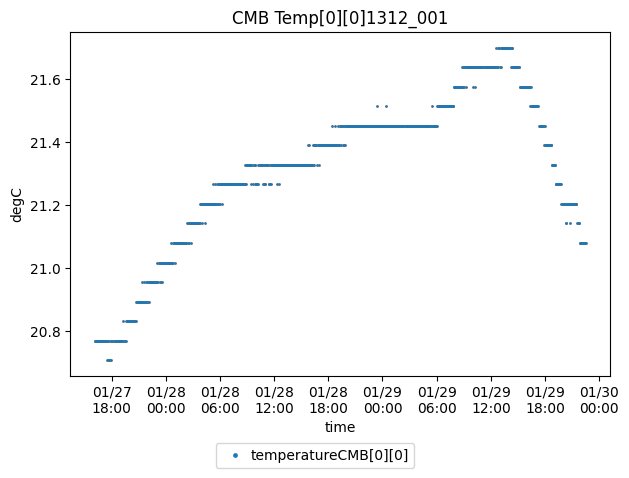

In [2]:
# plot temperatureCMB[0][0] of run1312_001:
tdict = {'1312_001':[["temperatureCMB[0][0]"]]}
tfig = utils.plot_dqm(fileList, tdict, '==0x0', True, nSmooth, True, "CMB Temp[0][0];time;degC") 

Reading file: rec.mu2e.CRV_wideband_cosmics.crvaging-007.001299_000.root
*** WARNING: CRV_spill: getTempCMB: Spill # 8 has no actual event
!!! spill 7, 0008 DQM = 0x6
*** WARNING: CRV_spill: getTempCMB: Spill # 25 has no actual event
!!! spill 24, 0025 DQM = 0xff00000000000e
*** WARNING: CRV_spill: getTempCMB: Spill # 68 has no actual event
!!! spill 67, 0068 DQM = 0x6
*** WARNING: CRV_spill: getTempCMB: Spill # 70 has no actual event
!!! spill 69, 0070 DQM = 0xff00000000000e
*** WARNING: CRV_spill: getTempCMB: Spill # 83 has no actual event
!!! spill 82, 0083 DQM = 0x6
*** WARNING: CRV_spill: getTempCMB: Spill # 103 has no actual event
!!! spill 102, 0103 DQM = 0xff00000e
*** WARNING: CRV_spill: getTempCMB: Spill # 105 has no actual event
!!! spill 104, 0105 DQM = 0x6
*** WARNING: CRV_spill: getTempCMB: Spill # 124 has no actual event
!!! spill 123, 0124 DQM = 0xff0000000e
*** WARNING: CRV_spill: getTempCMB: Spill # 148 has no actual event
!!! spill 147, 0148 DQM = 0x6
*** WARNING: CR

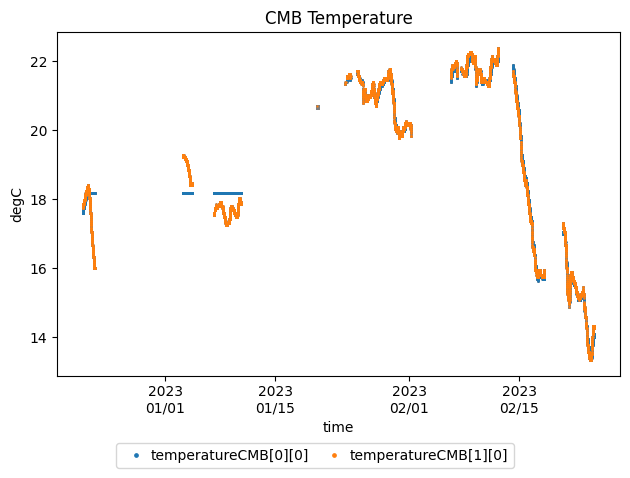

In [3]:
# plot temperatureCMB[0:1][0] of all files:
tdict = {'*':[["temperatureCMB[0][0]","temperatureCMB[1][0]"]]}
tfig = utils.plot_dqm(fileList, tdict, '==0x0', False, nSmooth, True, "CMB Temperature;time;degC") 

In [4]:
# full DQM

plotAttribute = [["temperatureFEB[0:2]", "temperatureCMB[0][0]"],
                 ["temperatureFEB[2:4]", "temperatureCMB[2][0]"],
                 ["temperatureFEB[4:6]", "temperatureCMB[4][0]"],
                 ["supply15V[0:2]", "supply10V[0:2]"],
                 ["supply5V[0:2]", "supplyN5V[0:2]"],
                 ["supply3V3[0:2]", "supply2V5[0:2]"],
                 ["supply1V8[0:2]", "supply1V2[0:2]"],
                 ["supply15V[2:4]", "supply10V[2:4]"],
                 ["supply5V[2:4]", "supplyN5V[2:4]"],
                 ["supply3V3[2:4]", "supply2V5[2:4]"],
                 ["supply1V8[2:4]", "supply1V2[2:4]"],
                 ["supply15V[4:6]", "supply10V[4:6]"],
                 ["supply5V[4:6]", "supplyN5V[4:6]"],
                 ["supply3V3[4:6]", "supply2V5[4:6]"],
                 ["supply1V8[4:6]", "supply1V2[4:6]"],
                 ["busSiPMBias[0][0:4]"],
                 ["busSiPMBias[0][4:8]"],
                 ["busSiPMBias[1][0:4]"],
                 ["busSiPMBias[1][4:8]"],
                 ["busSiPMBias[2][0:4]"],
                 ["busSiPMBias[2][4:8]"],
                 ["busSiPMBias[3][0:4]"],
                 ["busSiPMBias[3][4:8]"],
                 ["busSiPMBias[4][0:4]"],
                 ["busSiPMBias[4][4:8]"],
                 ["busSiPMBias[5][0:4]"],
                 ["busSiPMBias[5][4:8]"],
                 ["settingPipelineLen[0:2]", "settingSampleLen[0:2]"],
                 ["settingPipelineLen[2:4]", "settingSampleLen[2:4]"],
                 ["settingPipelineLen[4:6]", "settingSampleLen[4:6]"],
                 ["temperatureCMB[0][0:16:4]"], # channels on the same CMB read a single CMB temperature
                 ["temperatureCMB[0][16:32:4]"],
                 ["temperatureCMB[0][32:48:4]"],
                 ["temperatureCMB[0][48:64:4]"],
                 ["temperatureCMB[1][0:16:4]"],
                 ["temperatureCMB[1][16:32:4]"],
                 ["temperatureCMB[1][32:48:4]"],
                 ["temperatureCMB[1][48:64:4]"],
                 ["temperatureCMB[2][0:16:4]"],
                 ["temperatureCMB[2][16:32:4]"],
                 ["temperatureCMB[2][32:48:4]"],
                 ["temperatureCMB[2][48:64:4]"],
                 ["temperatureCMB[3][0:16:4]"],
                 ["temperatureCMB[3][16:32:4]"],
                 ["temperatureCMB[3][32:48:4]"],
                 ["temperatureCMB[3][48:64:4]"],
                 ["temperatureCMB[4][0:16:4]"],
                 ["temperatureCMB[4][16:32:4]"],
                 ["temperatureCMB[4][32:48:4]"],
                 ["temperatureCMB[4][48:64:4]"],
                 ["temperatureCMB[5][0:16:4]"],
                 ["temperatureCMB[5][16:32:4]"],
                 ["temperatureCMB[5][32:48:4]"],
                 ["temperatureCMB[5][48:64:4]"]]
keyList = ["%i"%i for i in runNumList]

pdfpages = PdfPages("temperatureScanDQM.pdf")   

for ikey, tkey in enumerate(keyList):
    tdict = {tkey:[]}
    for attributeList in plotAttribute:
        iFEB = int(attributeList[0].split(']')[0].split('[')[-1].split(':')[0])
        if nFEBlist[ikey]>iFEB:
            tdict[tkey].append(attributeList)

    if tdict:
        figlist = utils.plot_dqm(fileList, tdict, '== 0x0', False, nSmooth, False, "Run # ;time;") 
        for tfig in figlist:
            pdfpages.savefig(tfig)
            plt.close(tfig)

pdfpages.close()

# from IPython.display import IFrame
# IFrame("temperatureScanDQM.pdf", width=1200, height=900)

Reading file: rec.mu2e.CRV_wideband_cosmics.crvaging-007.001299_000.root
*** WARNING: CRV_spill: getTempCMB: Spill # 8 has no actual event
!!! spill 7, 0008 DQM = 0x6
*** WARNING: CRV_spill: getTempCMB: Spill # 25 has no actual event
!!! spill 24, 0025 DQM = 0xff00000000000e
*** WARNING: CRV_spill: getTempCMB: Spill # 68 has no actual event
!!! spill 67, 0068 DQM = 0x6
*** WARNING: CRV_spill: getTempCMB: Spill # 70 has no actual event
!!! spill 69, 0070 DQM = 0xff00000000000e
*** WARNING: CRV_spill: getTempCMB: Spill # 83 has no actual event
!!! spill 82, 0083 DQM = 0x6
*** WARNING: CRV_spill: getTempCMB: Spill # 103 has no actual event
!!! spill 102, 0103 DQM = 0xff00000e
*** WARNING: CRV_spill: getTempCMB: Spill # 105 has no actual event
!!! spill 104, 0105 DQM = 0x6
*** WARNING: CRV_spill: getTempCMB: Spill # 124 has no actual event
!!! spill 123, 0124 DQM = 0xff0000000e
*** WARNING: CRV_spill: getTempCMB: Spill # 148 has no actual event
!!! spill 147, 0148 DQM = 0x6
*** WARNING: CR

/nashome/y/yongyiwu/CRVteststand/analysis/testbench/utils.py:181: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


Reading file: rec.mu2e.CRV_wideband_cosmics.crvaging-007.001300_000.root
*** WARNING: CRV_spill: getTempCMB: Spill # 5 has no actual event
!!! spill 4, 0005 DQM = 0xff00000000000e
*** WARNING: CRV_spill: getTempCMB: Spill # 10 has no actual event
!!! spill 9, 0010 DQM = 0x6
*** WARNING: CRV_spill: getTempCMB: Spill # 15 has no actual event
!!! spill 14, 0015 DQM = 0xff0000000e
*** WARNING: CRV_spill: getTempCMB: Spill # 18 has no actual event
!!! spill 17, 0018 DQM = 0x6
*** WARNING: CRV_spill: getTempCMB: Spill # 20 has no actual event
!!! spill 19, 0020 DQM = 0x6
*** WARNING: CRV_spill: getTempCMB: Spill # 27 has no actual event
!!! spill 26, 0027 DQM = 0x6
*** WARNING: CRV_spill: getTempCMB: Spill # 41 has no actual event
!!! spill 40, 0041 DQM = 0x6
*** WARNING: CRV_spill: getTempCMB: Spill # 42 has no actual event
!!! spill 41, 0042 DQM = 0xff000000000e
*** WARNING: CRV_spill: getTempCMB: Spill # 76 has no actual event
!!! spill 75, 0076 DQM = 0x6
*** WARNING: CRV_spill: getTempCM